# Final exam from "Introduction to Machine Learning" - Romario Stanković 2020230210

## Instructions:

1. Linear Regression

- Choosing a dataset
- Plot the data
-  Compute Cost Function
- Make a function that run gradient descent
- Compute Cost Function for multivariate Linear Regression
- Compute Cost for multivariate Gradient Descent
- Do the feature normalization
- Make a function that computes the normal equation.

2. Logistic Regression

- Choosing a dataset
- Plot the data
- Make code that computes sigmoid function
- Compute the Logistic Regression Cost Function
- Make a prediction for the test sample
- Compute Regularized Cost Function

3. Neural Networks

- Choosing a dataset
- Compute the gradient of the sigmoid function
- Randomly initialize weights
- Compute Neural network cost function

4. Kmeans

- Choosing a dataset
- Plot the data
- Initialize K means centroids
- Find the closesr Centroids
- Compute Centroids means
- Run K means algorithm
- Plot each step of Kmeans as it processds

### 0) Setup

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [204]:
# Computes the square of a vector
def square(V : np.ndarray):
    return V ** 2

In [205]:
# Computes the average of a vector
def avg(V : np.ndarray):
    return sum(V) / len(V)

In [206]:
# Transposes a matrix
def transpose(M : np.ndarray):
    r = len(M)
    c = len(M[0])

    N = []

    for j in range(c):
        C = []
        for i in range(r):
            val = M[i][j]
            C.append(val)
        N.append(C)

    return np.array(N)

In [207]:
# Computes the dot product of a matrix and a vector
def dot(M : np.ndarray, V : np.ndarray):

    r = M.shape[0]
    c = M.shape[1]

    D = []

    for i in range(r):
        value = 0.0
        for j in range(c):
            value = value + M[i][j] * V[j]
        D.append(value)

    return np.array(D)

In [208]:
# Computes the standard deviation of a vector
def std(V : np.ndarray):
    n = len(V)
    mean = avg(V)

    variation = 0.0
    for i in range(n):
        variation = variation + (V[i] - mean) ** 2

    std = (variation / n) ** 0.5

    return std

In [209]:
# Normalizes a matrix
def normalize(x : np.ndarray):

    n = x.shape[1]

    for i in range(n):

        m = avg(x[:, i])
        s = std(x[:, i])

        x[:, i] = (x[:, i] - m) / s

    return x

In [210]:
# Splits the data into training and testing sets
def train_test_split(x : np.ndarray, y : np.ndarray, test_size = 0.2):

    m = x.shape[0]

    index = np.arange(m)
    np.random.shuffle(index)

    size = int(m * test_size)

    x_train = x[index[size:]]
    y_train = y[index[size:]]
    x_test = x[index[:size]]
    y_test = y[index[:size]]

    return (x_train, x_test, y_train, y_test)

In [211]:
# Encodes the labels (from strings to integers)
def encode_labels(y : np.ndarray):
    dict = {}
    index = 0

    result = []

    for i in range(len(y)):
        if y[i] not in dict:
            dict[y[i]] = index
            index = index + 1
        result.append(dict[y[i]])

    return np.array(result)

In [212]:
def mse(actual : np.ndarray, predicted : np.ndarray):

    return sum(square(actual - predicted)) / len(actual)

### 1) Linear Regression

Linear regression is a machine learning algorithm that is used to predict continuous values, such as prices, density, etc.

In this example, linear regression is used to predict the pH level of wine based on its features.

#### 1.1 Implementation

The linear regression algorithm is implemented with the following functions:

- `get_next_batch` - returns the next batch of data
- `calculate_cost` - calculates the cost of the current model
- `backwards_propagation` - updates the weights and biases of the model
- `hypothesis` - calculates the hypothesis of the model
- `fit` - fits the model to the data
- `predict` - predicts the output of the model

In [213]:
class LinearRegression:

    # Initialize LinearRegression
    def __init__(self, learning_rate : float = 0.01, iterations : int = 100, batch_size : int = 16):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost = []
        self.coef = None

    # Get the next batch of features and targets
    def get_next_batch(self, x : np.ndarray, y : np.ndarray):

        # Get number of samples
        m = x.shape[0]

        # Store the batch size in a local variable
        size = self.batch_size

        # Take (size) features and targets 
        for i in range(0, m, size):
            # Yield the result, stopping the function at this points until the next call
            yield ( x[i : i + size], y[i : i + size] )

    # Calculates the cost of the hypothesis
    def calculate_cost(self, hypothesis : np.ndarray, target : np.ndarray):
        # Get the number of samples
        s = hypothesis.shape[0]
        # Return the cost of linear regression
        return (1 / s) * 0.5 * sum(square(hypothesis - target))

    # Performs the backwards propagation
    def backwards_propagation(self, x : np.ndarray, y : np.ndarray, h : np.ndarray, theta : np.ndarray, no_samples : int):

        # Get number of theta variables
        n = theta.shape[0]

        # Update the bias
        theta[0] = theta[0] - (self.learning_rate * 2 / no_samples) * sum(h - y)

        # Update the coefficients
        for i in range(1, n):
            theta[i] = theta[i] - (self.learning_rate * 2 / no_samples) * sum((h - y) * transpose(x)[i])

        return theta

    # Calculates the hypothesis
    def hypothesis(self, x : np.ndarray, theta : np.ndarray):

        # Get the number of samples
        m = x.shape[0]
        n = x.shape[1]

        # initialize the hypothesis
        H = np.ones((m, 1))

        # Reshape theta to be a matrix with 1 row and n columns
        theta = theta.reshape(1, n)

        # Go through the samples and calculate the hypothesis
        for i in range(m):
            H[i] = dot(theta, x[i])

        # Return the hypothesis
        return H.reshape(m)

    # Fit the model
    def fit(self, x : np.ndarray, y : np.ndarray):

        # Get the number of features (n) and samples (m)
        no_samples = x.shape[0]
        no_features = x.shape[1]

        # Initialize the bias
        bias = np.ones((no_samples, 1))
        theta = np.random.randn(no_features+1) * 0.001

        x = np.concatenate((bias, x), axis = 1)

        # Reset the cost
        self.cost = []

        for _ in range(self.iterations):
            
            loss = []
            for _, (x_batch, y_batch) in enumerate(self.get_next_batch(x, y)):
                # Make a hypothesis
                h = self.hypothesis(x_batch, theta)

                # Add loss for each batch
                cost = self.calculate_cost(h, y_batch)
                loss.append(cost)

                theta = self.backwards_propagation(x_batch, y_batch, h, theta, no_samples)

            # Save the cost of this iteration
            self.cost.append(avg(loss))

        self.coef = theta
    
        return self

    # Predict the target
    def predict(self, x : np.ndarray):

        # Get the number of samples
        m = x.shape[0]

        # Initialize the bias
        bias = np.ones((m, 1))

        # Concatenate the bias with the input data
        x = np.concatenate((bias, x), axis = 1)

        # Make a hypothesis
        h = self.hypothesis(x, self.coef)

        return h

#### 1.2 Importing the dataset

The dataset chosen for this example is the [Red Wine Quality Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). It contains 11 features and 1 label. 

The features are: 

- `fixed acidity` - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- `volatile acidity` - the amount of acetic acid in wine
- `citric acid` - found in small quantities, citric acid can add 'freshness' and flavor to wines
- `residual sugar` - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- `chlorides` - the amount of salt in the wine
- `free sulfur dioxide` - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- `total sulfur dioxide` - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- `density` - the density of water is close to that of water depending on the percent alcohol and sugar content
- `pH` - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- `sulphates` - a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
- `alcohol` - the percent alcohol content of the wine

The label is:

- `quality` - output variable (based on sensory data, score between 0 and 10)

For this example, the label is not used as the target, rather the pH level is used as the target value for the linear regression model.

In [214]:
# Load the data
csv = np.loadtxt('wine-quality.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

# Select all except the pH column as the features
X = data[:, np.arange(data.shape[1]) != 8].astype(float)
# Select the pH column as the target
Y = data[:, 8].astype(float)

X = normalize(X)

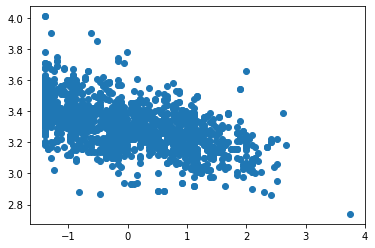

In [215]:
plt.scatter(X[:, 2], Y)

#### 1.3. Training the model

The data is split into training and testing sets. The training set is used to train the model, while the testing set is used to test the model.

In [216]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [217]:
model = LinearRegression(iterations=200)

model.fit(X, Y)

#### 1.4. Predicting the results

The model is used to predict the pH level of the wine. The predicted values are compared to the actual values to determine the accuracy of the model.

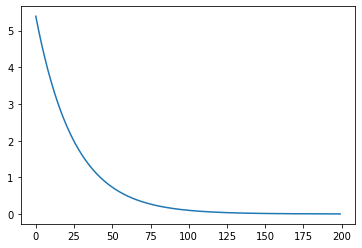

In [218]:
cost = model.cost

plt.plot(cost)

In [219]:
y_pred = model.predict(x_test)

err = mse(y_pred, y_test)

print(err)

0.013895905349867645


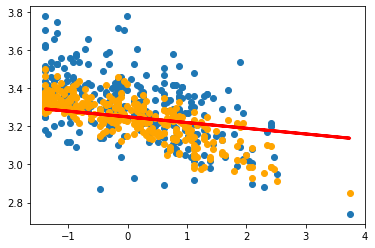

In [220]:
theta = model.coef

# Plot the actual data
plt.scatter(x_test[:, 2], y_test)
# Plot the predicted data
plt.scatter(x_test[:, 2], y_pred, c='orange')
# Plot the regression line
plt.plot(x_test[:, 2], theta[0] + theta[3] * x_test[:, 2], c='red', linewidth=3)

### 2) Logistic Regression

Logistic regression is a machine learning algorithm for classifications. The algorithm can predict a binary outcome which has two possible values such as yes/no, positive/negative, etc...

In this example, logistic regression is used to predict whether a patient has breast cancer. The possible outcomes are either malignant (cancerous) or benign (non-cancerous).

#### 2.1. Implementation

The logistic regression algorithm is implemented with the following functions:

- `get_next_batch` - returns the next batch of data
- `sigmoid` - calculates the sigmoid of the input
- `calculate_cost` - calculates the cost of the current model
- `fit` - fits the model to the data
- `predict` - predicts the output of the model

In [221]:
class LogisticRegression:

    # Initialize LogisticRegression
    def __init__(self, learning_rate : float = 0.001, regularization_param : float = 2, iterations : int = 100, batch_size : int = 10):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size
        self.regularization_param = regularization_param
        self.cost = []
        self.coef = None

    # Get the next batch of features and targets
    def get_next_batch(self, x : np.ndarray, y : np.ndarray):
            # Get the number of samples
            m = x.shape[0]
    
            # Store the batch size in a local variable
            size = self.batch_size
    
            # Take (size) features and targets 
            for i in range(0, m, size):
                # Yield the result, stopping the function at this points until the next call
                yield ( x[i : i + size], y[i : i + size] )

    # Sigmoid function (activation function)
    def sigmoid(self, z : np.ndarray):
        # Return the sigmoid of z
        return 1 / (1 + np.exp(-z))

    # Calculates the cost of the hypothesis
    def calculate_cost(self, h : np.ndarray, y : np.ndarray):
        # Add a small value to avoid division by zero
        e = 1e-10
        # Calculate the cost function
        return -avg(y * np.log(h + e) + (1 - y) * np.log(1 - h + e))

    # Fit the model
    def fit(self, x : np.ndarray, y : np.ndarray):

        # Get the number of features (n) and samples (m)
        n = x.shape[1]
        m = x.shape[0]

        # Initialize the bias
        bias = np.ones((m, 1))
        x = np.concatenate((bias, x), axis = 1)

        # Initialize the coefficients
        W = np.random.randn(n+1)

        # Reset the cost
        self.cost = []

        # Go through the iterations
        for _ in range(self.iterations):
            
            # Initialize the loss
            loss = []

            # Go through each batch
            for _, (x_batch, y_batch) in enumerate(self.get_next_batch(x, y)):

                # Get the number of samples in the batch
                bm = x_batch.shape[0]

                # Calculate the hypothesis
                z = dot(x_batch, W)
                h = self.sigmoid(z)

                # Calculate the cost
                ridge = (self.regularization_param / (2 * bm)) * sum(square(W))
                cost = self.calculate_cost(h, y_batch) + ridge
                loss.append(cost)

                # Calculate the gradient
                error = h - y_batch
                gradient = (1 / bm) * (dot(transpose(x_batch), error) + (self.regularization_param / bm) * W)

                # Update the coefficients
                W = W - self.learning_rate * gradient

            # Save the cost of this iteration
            self.cost.append(avg(loss))

        # Save the coefficients
        self.coef = W

        return self

    # Predict the labels
    def predict(self, x : np.ndarray, threshold : float = 0.5):

        labels = []

        # Get the coefficients
        W = self.coef[1:]
        # Get the bias
        b = self.coef[0]

        # Predict the labels
        y_pred = dot(x, W) + b
        # Calculate the activation
        activation = self.sigmoid(y_pred)

        # Go through the activation and assign the labels
        for i in activation:
            # If the activation is greater than the threshold, assign 1, else assign 0
            if i > threshold:
                labels.append(1)
            else:
                labels.append(0)

        # Return the labels
        return np.array(labels)

#### 2.2. Importing the dataset

The dataset chosen for this example is the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). It contains 30 features and 1 label.

The features are:

- `radius_mean` - mean of distances from center to points on the perimeter
- `texture_mean` - standard deviation of gray-scale values
- `perimeter_mean` - mean size of the core tumor
- `area_mean` - #
- `smoothness_mean` - mean of local variation in radius lengths
- `compactness_mean` - mean of perimeter^2 / area - 1.0
- `concavity_mean` - mean of severity of concave portions of the contour
- `concave points_mean` - mean for number of concave portions of the contour
- `symmetry_mean` - #
- `fractal_dimension_mean` - mean for "coastline approximation" - 1
- `radius_se` - standard error for the mean of distances from center to points on the perimeter
- `texture_se` - standard error for standard deviation of gray-scale values
- `perimeter_se` - #
- `area_se` - #
- `smoothness_se` - standard error for local variation in radius lengths
- `compactness_se` - standard error for perimeter^2 / area - 1.0
- `concavity_se` - standard error for severity of concave portions of the contour
- `concave points_se` - standard error for number of concave portions of the contour
- `symmetry_se` - #
- `fractal_dimension_se` - standard error for "coastline approximation" - 1
- `radius_worst` - "worst" or largest mean value for mean of distances from center to points on the perimeter
- `texture_worst` - "worst" or largest mean value for standard deviation of gray-scale values
- `perimeter_worst` - #
- `area_worst` - #
- `smoothness_worst` - "worst" or largest mean value for local variation in radius lengths
- `compactness_worst` - "worst" or largest mean value for perimeter^2 / area - 1.0
- `concavity_worst` - "worst" or largest mean value for severity of concave portions of the contour
- `concave points_worst` - "worst" or largest mean value for number of concave portions of the contour
- `symmetry_worst` - #
- `fractal_dimension_worst` - "worst" or largest mean value for "coastline approximation" - 1

The label is:

- `diagnosis` - The diagnosis of breast tissues (M = malignant, B = benign)

In [222]:
csv = np.loadtxt('breast-cancer.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

X = data[:, 1:].astype(float)
Y = data[:, 0]

X = normalize(X)
Y = encode_labels(Y)

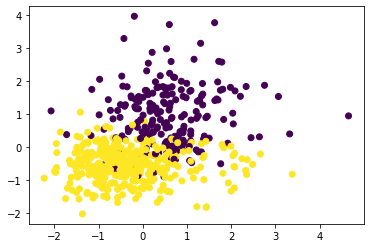

In [223]:
plt.scatter(X[:, 1], X[:, 0], c=Y)

#### 2.3 Training the model

The data is split into training and testing sets. The training set is used to train the model, while the testing set is used to test the model.

In [224]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [225]:
model = LogisticRegression(iterations=100, learning_rate=0.01, regularization_param=0.1)

model.fit(x_train, y_train)

#### 2.4. Predicting the results

The model is used to predict whether a patient has breast cancer. The predicted values are compared to the actual values to determine the accuracy of the model.

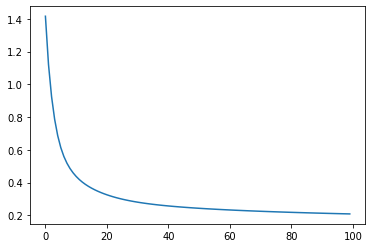

In [226]:
cost = model.cost

plt.plot(cost)

In [227]:
y_pred = model.predict(x_test)

print(sum(y_pred == y_test) / len(y_test))

0.9469026548672567


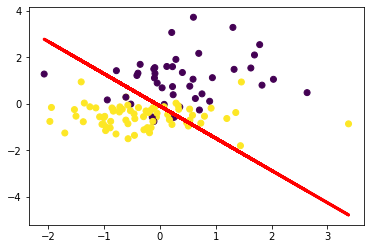

In [228]:
W = model.coef
plt.scatter(x_test[:, 1], x_test[:, 2], c=y_pred)
plt.plot(x_test[:, 1], (W[0] + W[2] * x_test[:, 1]), c='red', linewidth=3)

### 3) Neural Networks

Neural networks are a machine learning algorithm that is inspired by the human brain. Neural networks are used for both regression and classification problems.

In this example, a neural network is used to predict the price range of a mobile phone based on its features.

#### 3.1. Implementation

The neural network algorithm is implemented with the following functions:

- `init_wights` - initializes the weights of the neural network
- `sigmoid` - calculates the sigmoid of the input
- `derived_sigmoid` - calculates the derivative of the sigmoid function
- `dot_product` - calculates the dot product of two matrices
- `forward_propagation` - calculates the forward propagation of the neural network
- `back_propagation` - calculates the backward propagation of the neural network
- `update_weights` - updates the weights
- `fit` - fits the model to the data
- `predict` - predicts the output of the model

In [229]:
class NeuralNetwork:

    # Initialize NeuralNetwork
    def __init__(self, iterations : int = 100, learning_rate : float = 0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.costs = []
        self.network = []

    # Initialize the weights randomly
    def init_weights(self, n_features : int, n_targets : int, n_hidden : int):

        hidden_layer_weights = []
        output_layer_weights = []

        # Initialize the weights randomly [0, 1] based on the number of inputs
        for _ in range(n_hidden):
            w = {"weights": [rd.random() for _ in range(n_features + 1)]}
            hidden_layer_weights.append(w)

        # Initialize the weights randomly [0, 1] based on the number of hidden neurons
        for _ in range(n_targets):
            w = {"weights": [rd.random() for _ in range(n_hidden + 1)]}
            output_layer_weights.append(w)

        self.network = [hidden_layer_weights, output_layer_weights]

    # Sigmoid function (activation function)
    def sigmoid(self, z : float):
        return 1 / (1 + np.exp(-z))

    # Derivative of the sigmoid function
    def derived_sigmoid(self, z : float):

        return z * (1 - z)

    def dot_product(self, weights, input_data):
        z = weights[-1]

        for i in range(len(weights)-1):
            z += weights[i] * input_data[i] 

        return z

    # Forward propagation (calculates the output of the network)
    def forward_propagation(self, x : np.ndarray):

        for layer in self.network:

            new_inputs = []

            for neuron in layer:
                # Calculate the output of the neuron
                z = self.dot_product(neuron["weights"], x)
                # Apply the activation function
                neuron["output"] = self.sigmoid(z)
                # Add the output to the new inputs
                new_inputs.append(neuron["output"])

            x = new_inputs

        return x

    # Backward propagation (calculates the error and updates the weights)
    def backward_propagation(self, y : np.ndarray):

        size = len(self.network)

        for i in reversed(range(size)):

            layer = self.network[i]
            errors = []
            layer_size = len(layer)

            if i != size - 1:
                for j in range(layer_size):
                    error = 0.0
                    for neuron in self.network[i + 1]:
                        error += neuron["weights"][j] * neuron["delta"]
                    errors.append(error)
            else:
                for j in range(layer_size):
                    neuron = layer[j]
                    error = y[j] - neuron["output"]
                    errors.append(error)

            for j in range(layer_size):
                neuron = layer[j]
                neuron["delta"] = errors[j] * self.derived_sigmoid(neuron["output"])

    # Update the weights
    def update_weights(self, x : np.ndarray):

        size = len(self.network)

        for i in range(size):

            inputs = x[:-1]

            if i != 0:
                inputs = [neuron["output"] for neuron in self.network[i - 1]]

            for neuron in self.network[i]:
                for j in range(len(inputs)):
                    neuron["weights"][j] += self.learning_rate * neuron["delta"] * inputs[j]
                neuron["weights"][-1] += self.learning_rate * neuron["delta"]

    def fit(self, x : np.ndarray, y : np.ndarray):

        # Define the targets by taking unique values from y
        # Number of targets is the number of output nodes
        targets = np.unique(y)

        # Number of samples
        m = x.shape[0]
        # Number of features
        n = x.shape[1]
        # Number of targets
        t = targets.shape[0]
        # Number of hidden neurons
        h = int((2/3) * (n + t))

        # Initialize weights
        self.init_weights(n, t, h)

        # Reset cost
        self.costs = []

        for _ in range(self.iterations):
            
            # Get the number of samples
            m = x.shape[0]

            # Set the error to 0
            error = 0.0

            # Go through each sample
            for i in range(m):

                # Make the predictions
                outputs = self.forward_propagation(x[i])

                # Define which neurons should have fired
                actual = (targets == y[i]) * 1

                # Calculate the error
                error += mse(actual, outputs)

                # Do backward propagation
                self.backward_propagation(actual)

                # Update the weights
                self.update_weights(x[i])

            # Append the cost
            self.costs.append(error)

    # Make a prediction
    def predict (self, x : np.ndarray):

        predictions = []

        for row in x:
            outputs = self.forward_propagation(row)

            predictions.append(outputs.index(max(outputs)))

        return predictions

#### 3.2. Importing the dataset

The dataset chosen for this example is the [Mobile Price Classification Dataset](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). It contains 20 features and 1 label.

The features are:

- `battery_power` - Total energy a battery can store in one time measured in mAh
- `blue` - Has bluetooth or not
- `clock_speed` - speed at which microprocessor executes instructions
- `dual_sim` - Has dual sim support or not
- `fc` - Front Camera mega pixels
- `four_g` - Has 4G or not
- `int_memory` - Internal Memory in Gigabytes
- `m_dep` - Mobile Depth in cm
- `mobile_wt` - Weight of mobile phone
- `n_cores` - Number of cores of processor
- `pc` - Primary Camera mega pixels
- `px_height` - Pixel Resolution Height
- `px_width` - Pixel Resolution Width
- `ram` - Random Access Memory in Megabytes
- `sc_h` - Screen Height of mobile in cm
- `sc_w` - Screen Width of mobile in cm
- `talk_time` - Longest time that a single battery charge will last when you are
- `three_g` - Has 3G or not
- `touch_screen` - Has touch screen or not
- `wifi` - Has wifi or not
  
The label is:
- `price_range` - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [230]:
csv = np.loadtxt('mobile-price.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :].astype(float)
X = data[:, :-1]
Y = data[:, -1]

X = normalize(X)

#### 3.3. Training the model

The data is split into training and testing sets. The training set is used to train the model, while the testing set is used to test the model.

In [231]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [232]:
model = NeuralNetwork(iterations=200, learning_rate=0.5)
model.fit(x_train, y_train)

#### 3.4. Predicting the results

The model is used to predict the price range of a mobile phone. The predicted values are compared to the actual values to determine the accuracy of the model.

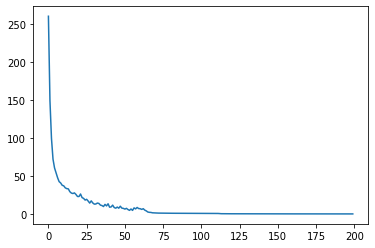

In [233]:
costs = model.costs

plt.plot(costs)

In [234]:
y_pred = model.predict(x_test)

accuracy = sum(y_pred == y_test) / len(y_test)

print(accuracy)

0.93


### 4) K-Means

K-Means is a clustering algorithm that is used to group data points into clusters. The algorithm works by finding the centroid of each cluster and then assigning each data point to the closest centroid.

In this example, K-Means is used to group the iris dataset into three clusters (setosa, versicolor, and virginica).

#### 4.1. Implementation

The K-Means algorithm is implemented with the following functions:

- `distance` - calculates the distance between two points
- `init_centroids` - initializes the centroids of the clusters
- `assign_centroids` - assigns each data point to the closest centroid
- `update_centroids` - updates the centroids of the clusters
- `fit` - fits the model to the data
- `predict` - predicts the output of the model

In [293]:
class KMeans:

    # Initialize KMeans
    def __init__(self, max_iterations : int = 100, n_clusters : int = 2):
        self.max_iterations = max_iterations
        self.n_clusters = n_clusters
        self.centroids = None
        self.history = []

    # Calculate the distance between two points
    def distance(self, a : np.ndarray, b : np.ndarray):
        return np.sqrt(sum((a - b) ** 2))

    # Select random samples as the initial centroids
    def init_centroids(self, x : np.ndarray):
        m = x.shape[0]

        indices = np.random.choice(m, self.n_clusters)
        return x[indices]

    # Assign each sample to the closest centroid
    def assign_to_centroid(self, x : np.ndarray):

        # Calculate the euclidean distance between each sample and each centroid
        distances = np.sqrt(((x - self.centroids[:, np.newaxis])**2).sum(axis=2))
        # Find the closest centroid for each sample
        clusters = np.argmin(distances, axis=0)
        # Return an array which contains the closest centroid index for each sample
        return np.array(clusters)

    # Update the centroids
    def update_centroids(self, x : np.ndarray, assignment : np.ndarray):
        centroids = []
        m = x.shape[0]

        for i in range(self.n_clusters):
            # Filter out the samples which belong to the current cluster
            assignments = x[assignment == i]

            # If there are samples which belong to the current cluster
            # Calculate the average of the samples and add it to the centroids
            if (len(assignments) > 0):
                centroids.append(avg(assignments))
            else:
                # Otherwise, select a random sample as the centroid
                centroids.append(x[np.random.choice(m)])
        # Return the updated centroids
        return np.array(centroids)

    # Fit the model
    def fit(self, x : np.ndarray):

        m = x.shape[0]

        # Initialize the centroids
        self.centroids = self.init_centroids(x)
        self.assignments = np.zeros(m)

        for _ in range(self.max_iterations):

            self.history.append(self.centroids)

            # Save the previous assignments
            prev_assignments = np.copy(self.assignments)
            # Assign each sample to the closest centroid
            self.assignments = self.assign_to_centroid(x)
            # Update the centroids
            self.centroids = self.update_centroids(x, self.assignments)
            
            # If the assignments didn't change, stop the training
            if (prev_assignments == self.assignments).all():
                break

        return self


#### 4.2. Importing the dataset

The dataset chosen for this example is the [Iris Dataset](https://www.kaggle.com/uciml/iris). It contains 4 features and 1 label.

The features are:

- `sepal_length` - Length of the sepal (in cm)
- `sepal_width` - Width of the sepal (in cm)
- `petal_length` - Length of the petal (in cm)
- `petal_width` - Width of the petal (in cm)

The label is:

- `species` - Species name (Setosa, Versicolor, Virginica)

In [300]:
csv = np.loadtxt('iris.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

X = data[:, :-1].astype(float)
Y = data[:, -1]

X = normalize(X)

Y = encode_labels(Y)

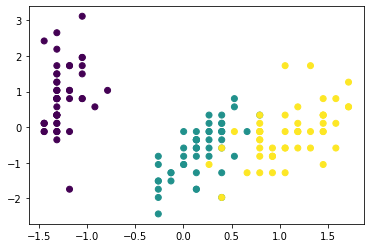

In [301]:
plt.scatter(X[:, 3], X[:, 1], c=Y)

#### 4.3. Training the model

The data is split into training and testing sets. The training set is used to train the model, while the testing set is used to test the model.

In [302]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [303]:
model = KMeans(n_clusters=3, max_iterations=100)
model.fit(x_train)

#### 4.4. Predicting the results

The model is used to predict the species of the iris flower. The predicted values are compared to the actual values to determine the accuracy of the model.

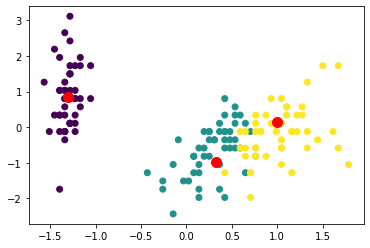

In [304]:
centroids = model.centroids

plt.scatter(X[:, 2], X[:, 1], c=Y)
plt.scatter(centroids[:, 2], centroids[:, 1], marker='o', s=100, c='r')

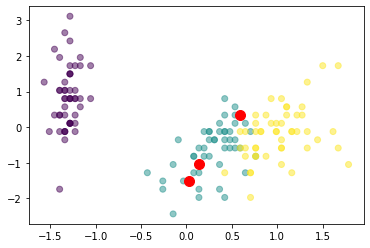

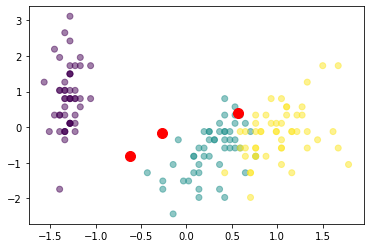

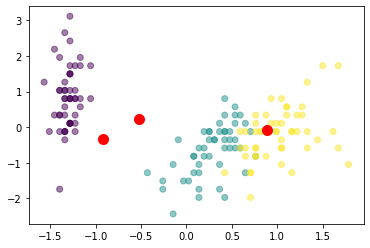

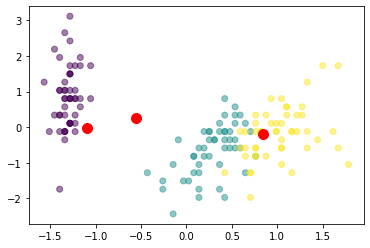

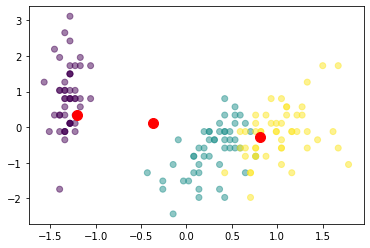

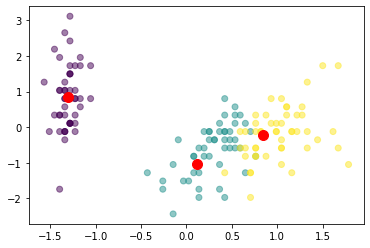

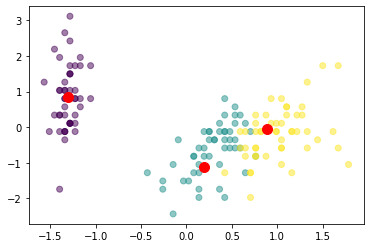

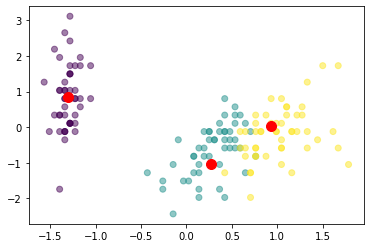

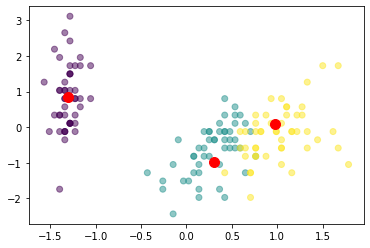

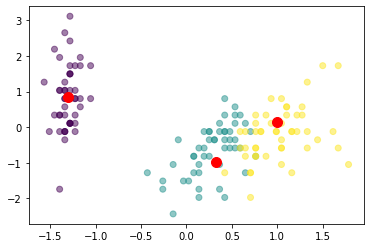

In [305]:
history = model.history

for i in range(len(history)):
    centroids = history[i]
    plt.scatter(X[:, 2], X[:, 1], c=Y, alpha=0.5)
    plt.scatter(centroids[:, 2], centroids[:, 1], marker='o', s=100, c='r')
    plt.show()